In [1]:
pip install twython

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install vaderSentiment

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas numpy matplotlib seaborn colorama plotly nltk tqdm wordcloud

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud




nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /home/mosaic-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/mosaic-ai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mosaic-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
pip install fosforml

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [9]:
my_session.connection.database
my_session.connection.schema


'CPG_SCHEMA'

In [10]:
table_name = 'SOCIAL_MEDIA_SENTIMENT'

sf_df = my_session.sql("select * from {} ".format(table_name))

In [11]:
sf_df = my_session.sql("select * from {} ".format(table_name))

In [12]:
type(sf_df)

snowflake.snowpark.dataframe.DataFrame

In [13]:
df = sf_df.to_pandas()

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df.head()

,TEXT,SENTIMENT,TIMESTAMP,USER,PLATFORM,HASHTAGS,RETWEETS,LIKES,COUNTRY,YEAR,MONTH,DAY,HOUR
0,Enjoying a beautiful day at the park!,Positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning.,Negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪,Positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway!,Positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight.,Neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [16]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,TEXT,object,0,0.000000
1,SENTIMENT,object,0,0.000000
2,TIMESTAMP,object,0,0.000000
3,USER,object,0,0.000000
4,PLATFORM,object,0,0.000000
5,HASHTAGS,object,0,0.000000
6,RETWEETS,int8,0,0.000000
7,LIKES,int8,0,0.000000
8,COUNTRY,object,0,0.000000
9,YEAR,int16,0,0.000000


In [17]:
df.duplicated().sum()

21

In [18]:
df.columns

Index(['TEXT', 'SENTIMENT', 'TIMESTAMP', 'USER', 'PLATFORM', 'HASHTAGS',
       'RETWEETS', 'LIKES', 'COUNTRY', 'YEAR', 'MONTH', 'DAY', 'HOUR'],
      dtype='object')

In [19]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

TEXT: 707 distinct values
SENTIMENT: 191 distinct values
TIMESTAMP: 683 distinct values
USER: 670 distinct values
PLATFORM: 3 distinct values
HASHTAGS: 692 distinct values
RETWEETS: 26 distinct values
LIKES: 38 distinct values
COUNTRY: 33 distinct values
YEAR: 14 distinct values
MONTH: 12 distinct values
DAY: 31 distinct values
HOUR: 22 distinct values


In [20]:
df['PLATFORM'].value_counts()

PLATFORM
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

In [21]:
df['PLATFORM'] = df['PLATFORM'].str.strip()

In [22]:
df.columns = [col.lower().capitalize() for col in df.columns]

In [23]:
df['Country'].value_counts()

Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Sweden              2
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Jordan              1
Peru                1
Maldives            1
China               1
Cambodia            1
Norway              1
Colombia            1
Ireland             1
Jamaica             1
Kenya               1
Scotland            1
Thailand            1
Name: count, dtype: int64

In [24]:
df['Country'] = df['Country'].str.strip()

In [25]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Day_of_Week'] = df['Timestamp'].dt.day_name()

In [26]:
month_mapping = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

df['Month'] = df['Month'].map(month_mapping)

df['Month'] = df['Month'].astype('object')

In [27]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')  # If you're using sentiment analysis


[nltk_data] Downloading package punkt to /home/mosaic-ai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mosaic-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /home/mosaic-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set()  # Define your stop words here

def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens
    if token.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text
# Apply the clean function to the 'Text' column
    df["Clean_Text"] = df["Text"].apply(clean)
    df["Clean_Text"] = df["Text"]


In [29]:
df.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'Day_of_Week'],
      dtype='object')

In [30]:
print(df.columns.tolist())

['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour', 'Day_of_Week']


In [31]:
specified_columns = ['Platform','Country', 'Year','Month','Day_of_Week']

for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')

Total unique values for Platform: 3
Instagram: 258
Twitter: 243
Facebook: 231


Total unique values for Country: 33
USA: 188
UK: 143
Canada: 135
Australia: 75
India: 70
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
Spain: 6
South Africa: 6
Greece: 5
Netherlands: 4
Switzerland: 3
Sweden: 2
Portugal: 2
Austria: 2
Belgium: 2
Denmark: 2
Czech Republic: 2
Jordan: 1
Peru: 1
Maldives: 1
China: 1
Cambodia: 1
Norway: 1
Colombia: 1
Ireland: 1
Jamaica: 1
Kenya: 1
Scotland: 1
Thailand: 1


Total unique values for Year: 14
2023: 289
2019: 73
2020: 69
2021: 63
2022: 63
2018: 56
2017: 43
2016: 38
2015: 19
2011: 4
2013: 4
2012: 4
2014: 4
2010: 3


Total unique values for Month: 12
Februari: 85
Januari: 82
Agustus: 78
September: 77
Juni: 71
Juli: 62
April: 51
November: 49
Oktober: 48
Mei: 46
Maret: 44
Desember: 39


Total unique values for Day_of_Week: 7
Sunday: 119
Saturday: 115
Tuesday: 110
Friday: 108
Monday: 97
Thursday: 95
Wednesday: 88




In [32]:
df1 = df.copy()

In [33]:
print(df1.columns)

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'Day_of_Week'],
      dtype='object')


In [34]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

In [35]:
explode = (0.1, 0, 0)

In [36]:
sentiment_counts = df1.groupby("Sentiment").size()

In [37]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set()  # Define your stop words here

In [38]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import pandas as pd

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set()  # Define your stop words here

def clean(text):
    if pd.isna(text):
        return ""  # Handle NaN values
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text
# Assuming df1 is your DataFrame with a 'Text' column
    df1["Clean_Text"] = df1["Text"].apply(clean)


In [39]:
df1.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'Day_of_Week'],
      dtype='object')

In [45]:
analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Text', 'Vader_Score', 'Sentiment']].head())

                                          Text  Vader_Score Sentiment
0        Enjoying a beautiful day at the park!       0.8221  positive
1           Traffic was terrible this morning.      -0.4767  negative
2          Just finished an amazing workout! 💪       0.6239  positive
3  Excited about the upcoming weekend getaway!       0.4003  positive
4  Trying out a new recipe for dinner tonight.       0.0000   neutral


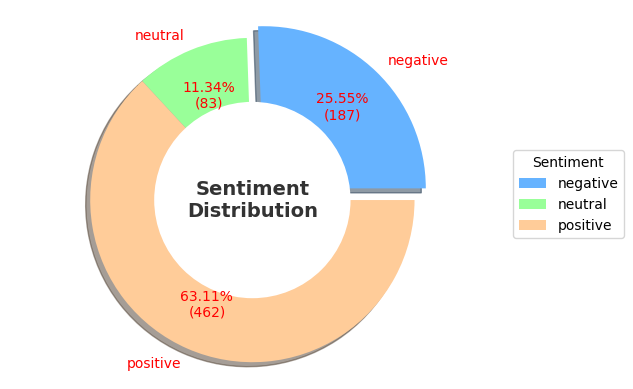

In [46]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.1, 0, 0)  

sentiment_counts = df1.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()


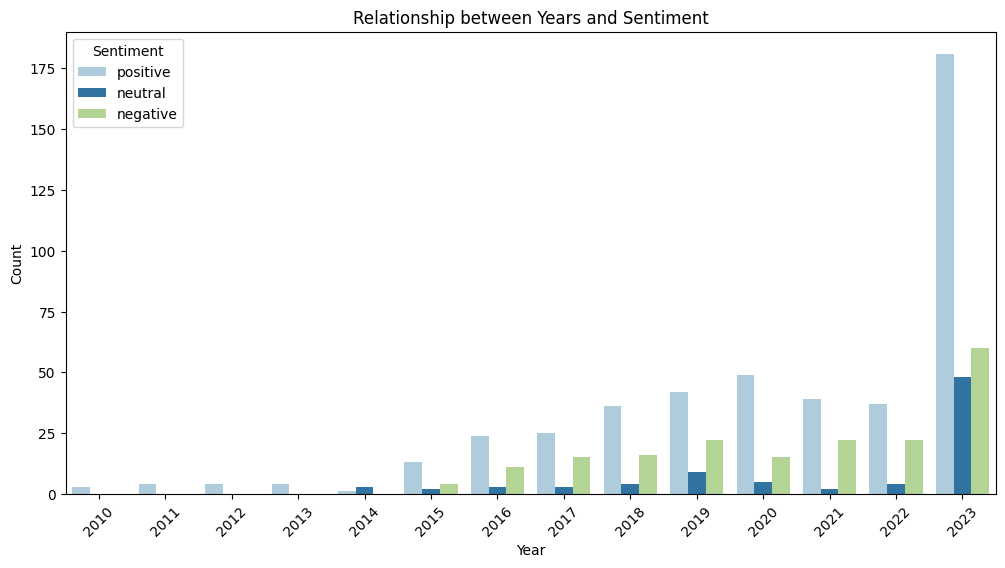

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

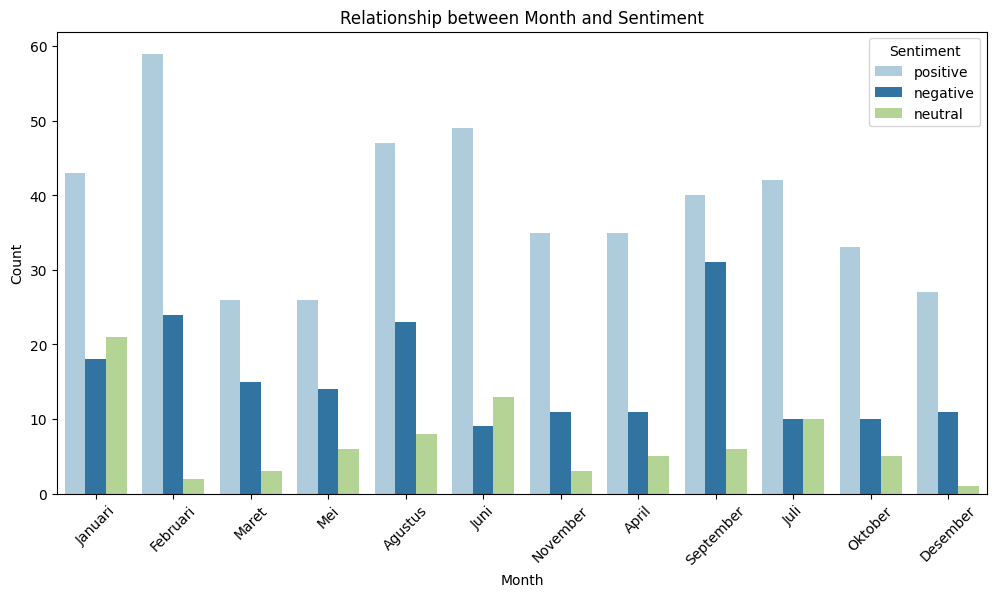

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

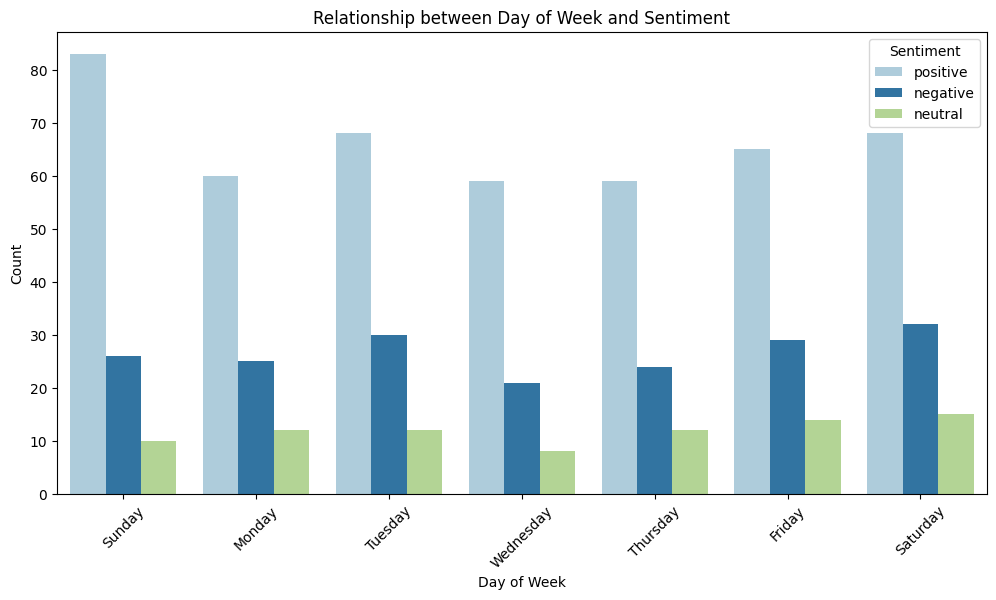

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

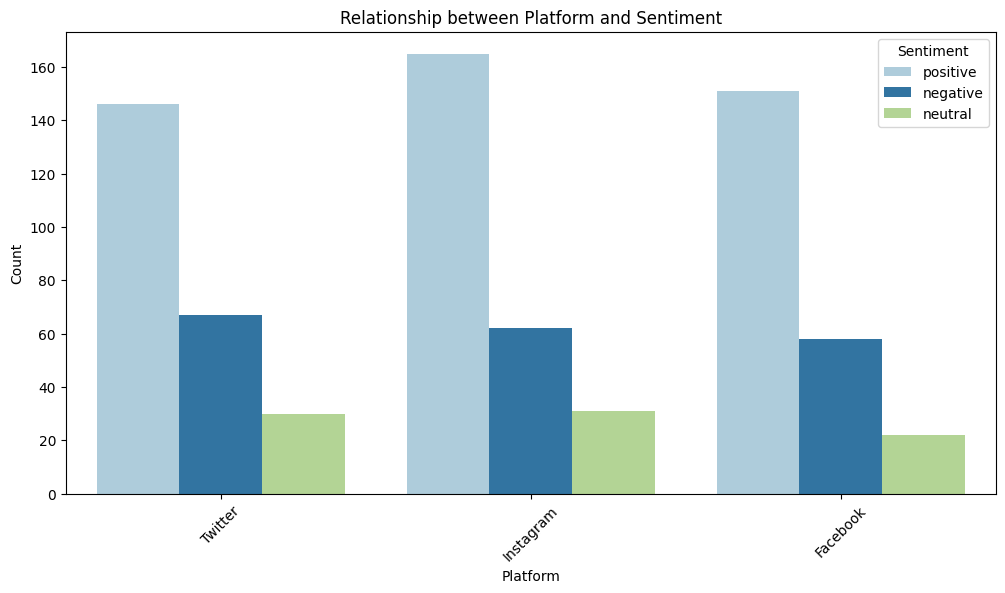

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

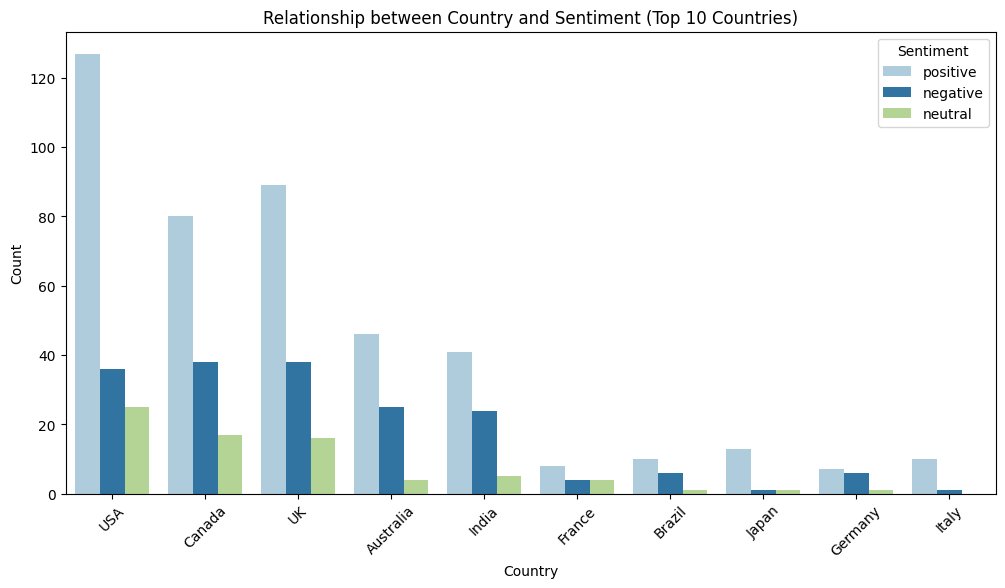

In [52]:
plt.figure(figsize=(12, 6))

top_10_countries = df1['Country'].value_counts().head(10).index

df_top_10_countries = df1[df1['Country'].isin(top_10_countries)]

sns.countplot(x='Country', hue='Sentiment', data=df_top_10_countries, palette='Paired')
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [60]:
df1['temp_list'] = df1['Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,808
1,of,623
2,a,621
3,in,259
4,to,133
5,and,111
6,with,107
7,for,99
8,on,91
9,by,69


In [56]:
Positive_sent = df1[df1['Sentiment'] == 'positive']
Negative_sent = df1[df1['Sentiment'] == 'negative']
Neutral_sent = df1[df1['Sentiment'] == 'neutral']

In [57]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,the,516
1,a,414
2,of,406
3,in,165
4,and,85
5,with,77
6,to,77
7,for,71
8,on,61
9,by,37
